## Контекст ##

Компания провела две рекламные кампании на разных платформах —

«Яндекс Дзен» и VK

— для продвижения нового продукта. Рекламные объявления были запущены одновременно, и целевая аудитория была одинаковая. Основной метрикой для оценки эффективности рекламных кампаний был средний чек на сайте.

Задача: проверить, какой из каналов для компании выгоднее и прибыльнее.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

df = pd.read_excel('dataset.xlsx')
df.head(20)

,user_id,group,transaction_sum
0,21060,VK,944
1,26196,dzen,562
2,21968,VK,254
3,21098,VK,1063
4,58112,VK,1479
5,57821,dzen,805
6,58959,dzen,271
7,67305,dzen,1372
8,87261,VK,200
9,55129,VK,248


In [2]:

df.shape

(520, 3)

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          520 non-null    int64 
 1   group            520 non-null    object
 2   transaction_sum  517 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.3+ KB


In [4]:

df.dtypes

user_id             int64
group              object
transaction_sum    object
dtype: object

In [5]:

df['transaction_sum'] = pd.to_numeric(df['transaction_sum'], errors = 'coerce')
df.dtypes

### или df1['transaction_sum'] = df1['transaction_sum'].astype(float)

user_id              int64
group               object
transaction_sum    float64
dtype: object

In [6]:

df.shape

(520, 3)

In [7]:

df.isnull().sum()

user_id            0
group              0
transaction_sum    7
dtype: int64

In [8]:

df1 = df[~df['transaction_sum'].isnull()]
df1.isnull().sum()

user_id            0
group              0
transaction_sum    0
dtype: int64

In [9]:

df1.shape

(513, 3)

In [10]:

df1['transaction_sum'].describe()

count     513.000000
mean      748.358674
std       435.633846
min         1.000000
25%       369.000000
50%       728.000000
75%      1111.000000
max      1500.000000
Name: transaction_sum, dtype: float64

In [11]:

m = df1['user_id'].nunique()
m

513

In [12]:

df1['group'].value_counts()

group
dzen    275
VK      238
Name: count, dtype: int64

In [13]:

df_a_dz = df1[df1['group'] == 'dzen']
df_a_dz['transaction_sum'].describe()

count     275.000000
mean      768.421818
std       435.156684
min         2.000000
25%       382.000000
50%       759.000000
75%      1171.000000
max      1500.000000
Name: transaction_sum, dtype: float64

In [14]:

df_b_vk = df1[df1['group'] == 'VK']
df_b_vk['transaction_sum'].describe()

count     238.000000
mean      725.176471
std       435.948641
min         1.000000
25%       362.500000
50%       704.000000
75%      1068.750000
max      1492.000000
Name: transaction_sum, dtype: float64

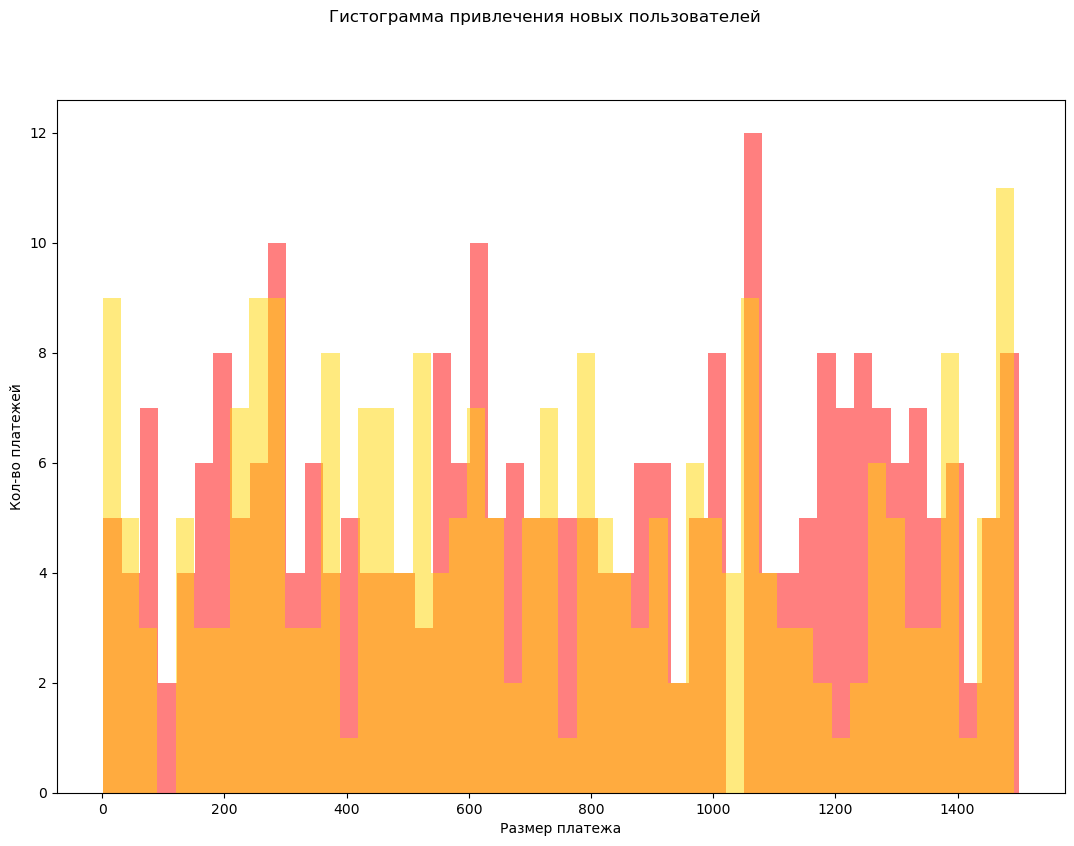

In [15]:

plt.rcParams["figure.figsize"] = (13,9)

fig, ax = plt.subplots()
fig.suptitle('Гистограмма привлечения новых пользователей')
ax.hist(df_a_dz['transaction_sum'], bins=50, color = 'red', alpha=.5)
ax.hist(df_b_vk['transaction_sum'], bins=50, color = 'gold', alpha=.5)
ax.set_xlabel("Размер платежа")
ax.set_ylabel("Кол-во платежей")
plt.show()

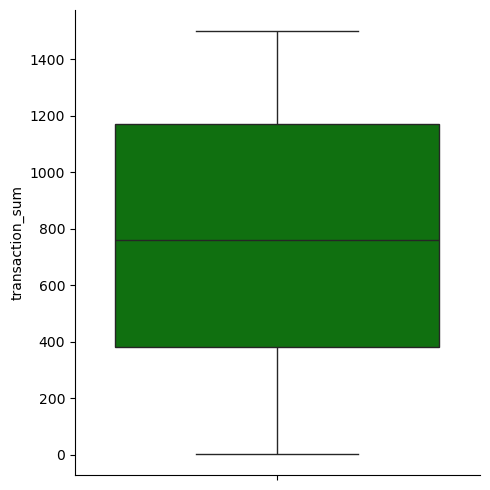

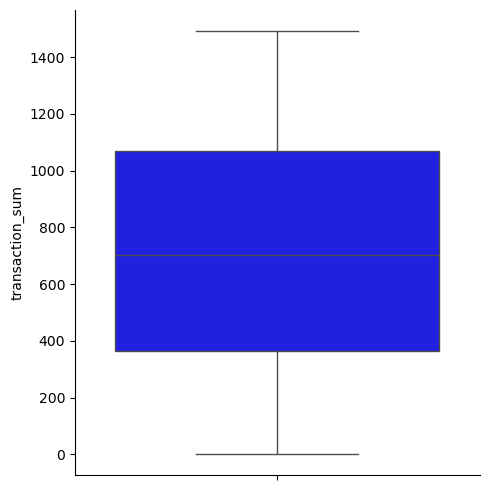

In [16]:

sns.catplot(data = df_a_dz['transaction_sum'], kind="box", color = 'green')
sns.catplot(data = df_b_vk['transaction_sum'], kind="box", color = 'blue')
plt.show()

In [17]:

mw_stat, p_value = mannwhitneyu(x = df_a_dz['transaction_sum'], y = df_b_vk['transaction_sum'])
print(mw_stat)
print(p_value)

34578.0
0.26855228946299314


In [19]:

alpha = 0.05
if p_value >= alpha:
  print(f'Принимаем H0 -> нет стат. значимой разницы между выборками. p value = {p_value}')
else:
  print(f'Принимаем H1 -> есть стат. значимая разница между выборками. p value = {p_value}')

Принимаем H0 -> нет стат. значимой разницы между выборками. p value = 0.26855228946299314
